# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [76]:
df = pd.read_csv('./data/ForeignGifts_edu.csv')
print(df.head())

   ID   OPEID               Institution Name          City State  \
0   1  102000  Jacksonville State University  Jacksonville    AL   
1   2  104700                Troy University          Troy    AL   
2   3  105100          University of Alabama    Tuscaloosa    AL   
3   4  105100          University of Alabama    Tuscaloosa    AL   
4   5  105100          University of Alabama    Tuscaloosa    AL   

   Foreign Gift Received Date  Foreign Gift Amount      Gift Type  \
0                       43738               250000  Monetary Gift   
1                       43592               463657       Contract   
2                       43466              3649107       Contract   
3                       43472                 1000       Contract   
4                       43479                49476       Contract   

  Country of Giftor                          Giftor Name  
0             CHINA                                  NaN  
1             CHINA     Confucius Institute Headquarters  

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64


<Axes: >

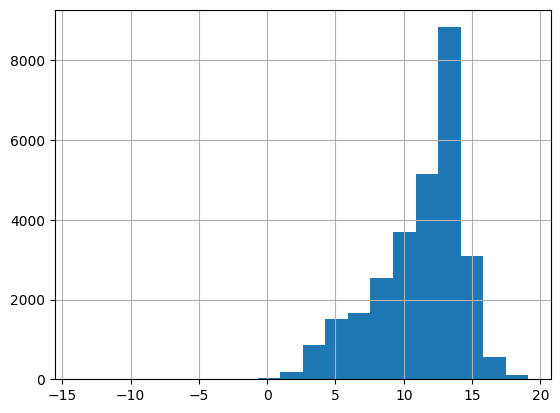

In [77]:
print(df['Foreign Gift Amount'].describe())
np.arcsinh(df['Foreign Gift Amount']).hist(bins=20)

The data is slightly skewed left. Most of the gift amounts are between 12-13. The histogram ranges from around 0-18. 

In [78]:
gift_type_counts = df['Gift Type'].value_counts(normalize=True)
print(gift_type_counts, "\n")
cont, mon, real = gift_type_counts["Contract"], gift_type_counts["Monetary Gift"], gift_type_counts["Real Estate"]
print(f"proportion of contracts:{cont}, real estate:{mon}, and monetary gifts:{real}")

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64 

proportion of contracts:0.6120973742957372, real estate:0.3875128450444704, and monetary gifts:0.00038978065979235324


c:\Users\jianp\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


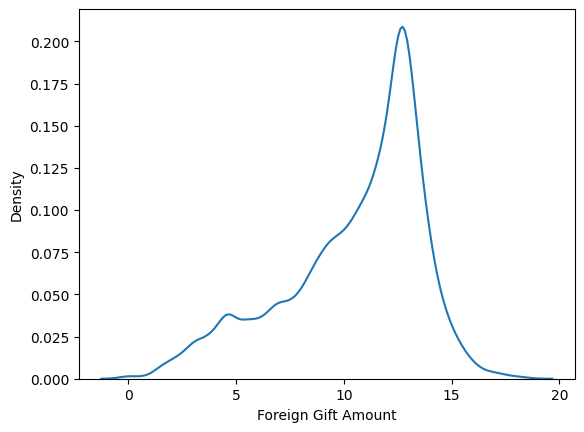

c:\Users\jianp\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


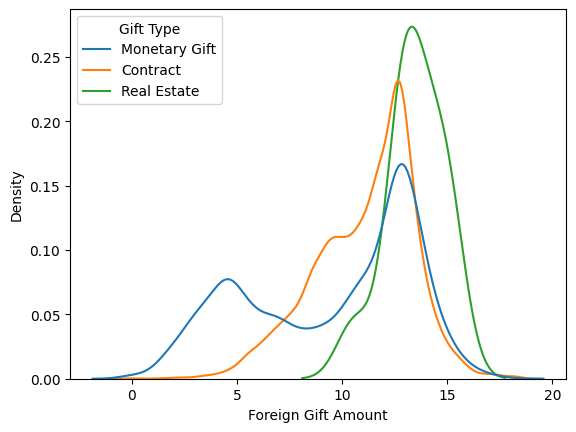

In [79]:
sns.kdeplot(np.log(df['Foreign Gift Amount']))
plt.show() 

sns.kdeplot(data=df, x=np.log(df['Foreign Gift Amount']), hue='Gift Type', common_norm=False)
plt.show()

All 3 gift types peak at around 12-13 foreign gift amount, meaning most of the gift amounts are here. Real estate is mostly normal distribution while monetary and contract are much more left skewed. Monetary also has 2 peaks, meaning the most common gift amounts are at 12-13 and 5.

In [80]:
df1 = df.groupby('Country of Giftor').count()
numOfGifts = df1.nlargest(15, 'Foreign Gift Amount')  
print(numOfGifts, "\n")

amountGiven = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().nlargest(15)
print(amountGiven)

                     ID  OPEID  Institution Name  City  State  \
Country of Giftor                                               
ENGLAND            3655   3655              3655  3655   3655   
CHINA              2461   2461              2461  2461   2461   
CANADA             2344   2344              2344  2344   2344   
JAPAN              1896   1896              1896  1896   1896   
SWITZERLAND        1676   1676              1676  1676   1676   
SAUDI ARABIA       1610   1610              1610  1610   1610   
FRANCE             1437   1437              1437  1437   1437   
GERMANY            1394   1394              1394  1394   1394   
HONG KONG          1080   1080              1080  1080   1080   
SOUTH KOREA         811    811               811   811    811   
QATAR               693    693               693   693    693   
THE NETHERLANDS     512    512               512   512    512   
KOREA               452    452               452   452    452   
INDIA               434  

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


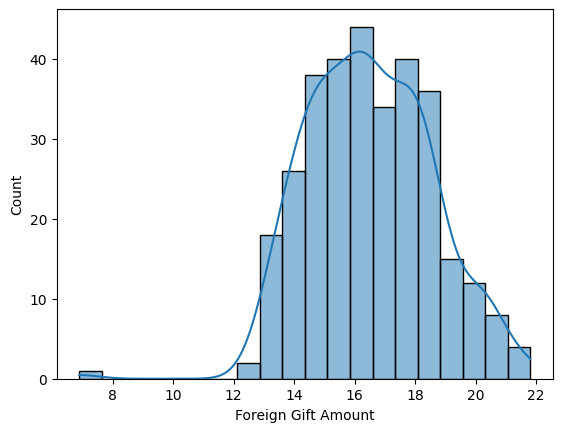

In [81]:
totalMoneyReceived = df.groupby('Institution Name')['Foreign Gift Amount'].sum().nlargest(15)
print(totalMoneyReceived)

sns.histplot(np.arcsinh(df.groupby('Institution Name')['Foreign Gift Amount'].sum()), bins=20, kde=True)
plt.show()

In [ ]:
topGiftors = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().nlargest(15)
print(topGiftors)

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [83]:
df = pd.read_csv('./data/airbnb_hw.csv')
print(df.head())

    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number Of Reviews Price  Review Scores R

In [84]:
print(df.shape, "\n")
print("number of observations: ", df.shape[0], "\n")
print("variables: ", df.columns)

(30478, 13) 

number of observations:  30478 

variables:  Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


In [ ]:
ct = pd.crosstab(df['Room Type'], df['Property Type'])
print(ct)

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

The majority of the rentals available are apartments for all 3 room types. The next most common is houses. The next most common is lofts. The other property types have significantly fewer availabilities. Private rooms are more common for bed and breakfast, castle, chalet, dorm, house, hut, tent, and treehouse.

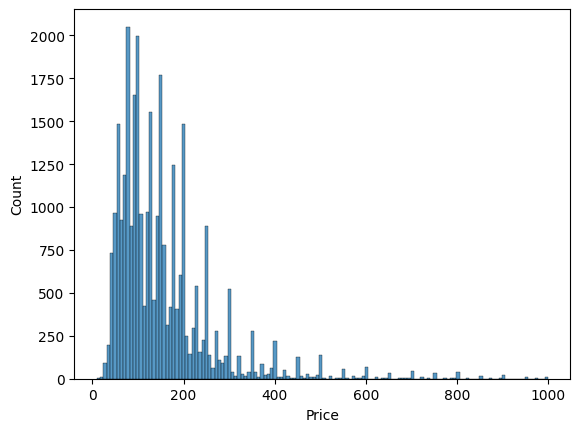

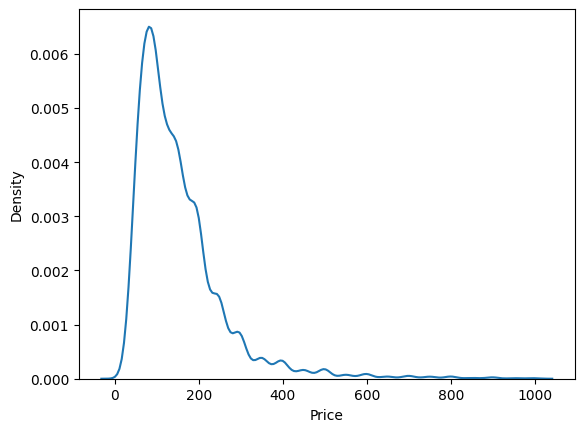

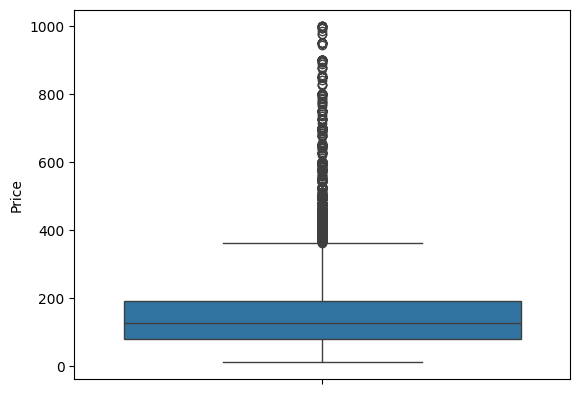

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64


In [86]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

sns.histplot(df["Price"])
plt.show()

sns.kdeplot(df["Price"])
plt.show()

sns.boxplot(df["Price"])
plt.show()

print(df['Price'].describe())

Yes. The data is badly scaled because the values beyond 400 have too small counts, resulting in the histogram being heavily skewed right and all values greater than 400 being considered outliers in the boxplot. There are many outliers as shown by the boxplot all values greater than 400 are considered outliers.

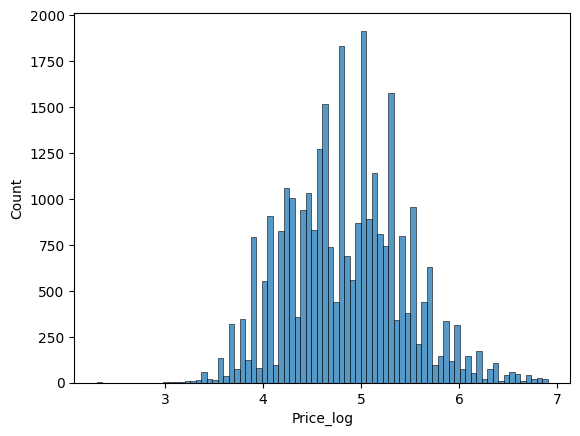

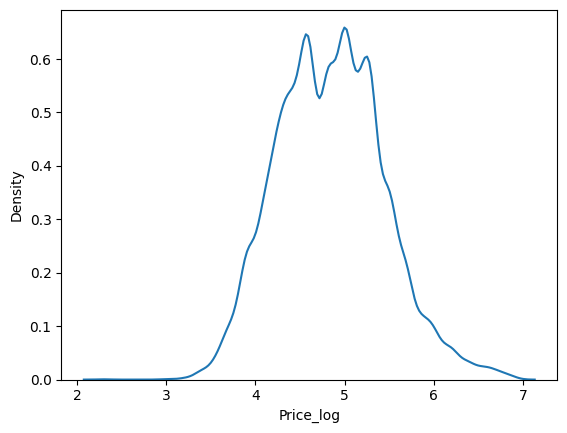

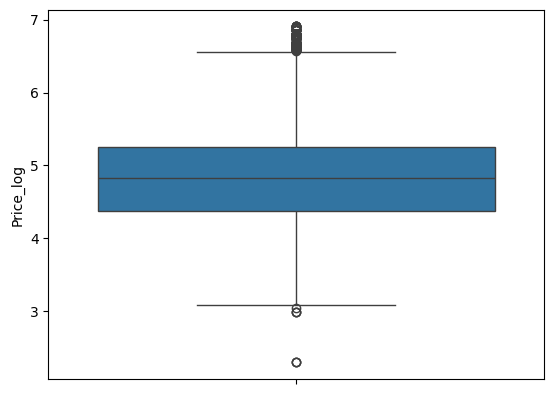

count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: Price_log, dtype: float64


In [87]:
df["Price_log"] = np.log(df["Price"])

sns.histplot(df["Price_log"])
plt.show()

sns.kdeplot(df["Price_log"])
plt.show()

sns.boxplot(df["Price_log"])
plt.show()

print(df["Price_log"].describe())

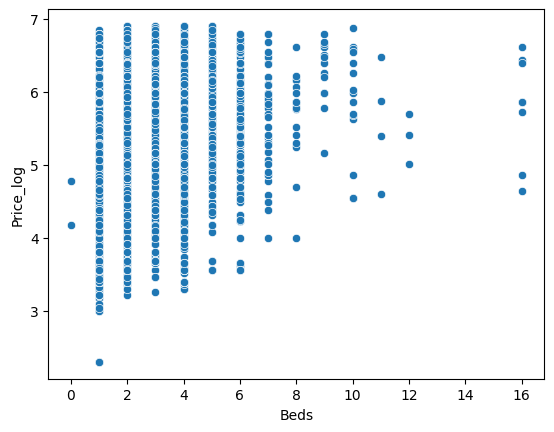

In [88]:
sns.scatterplot(x=df['Beds'], y=df['Price_log'])
plt.show()

There isn't much correlation between price_log and beds. You can generally see that as the number of beds increase, the minimum price_log also increases. However, the maximum price_log stays the same for all number of beds.

In [89]:
beds_summary = df.groupby('Beds')['Price'].describe()
print(beds_summary)

        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  400.0  650.00  975.0
11.0      4.0  332.250000

 The average price and standard deviation tends to increase as the number of beds increases, with an exception for 12 beds which has a noticeable dip in the average and standard deviation.

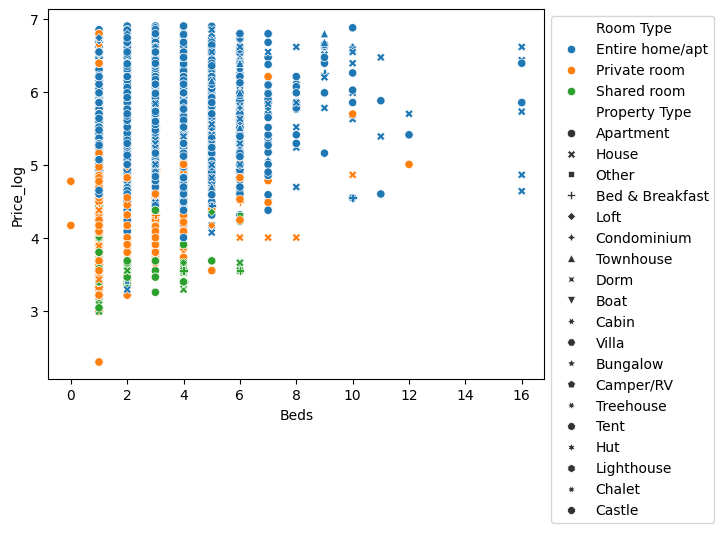

In [90]:
sns.scatterplot(x=df['Beds'], y=df['Price_log'], hue=df['Room Type'], style=df['Property Type'])
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Majority of the property types are apartments. The second most common property type is houses. Private rooms tend to be cheaper and have fewer beds. The entire home/apartment tends to be more expensive, and majority have up to 8 beds. Shared rooms are the cheapest and have the fewest number of beds.

In [91]:
room_property_summary = df.groupby(['Room Type', 'Property Type'])['Price'].describe()
print(room_property_summary)

                                   count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other    

The property type other and room type entire home/apartment has the highest price on average and highest standard deviation. The median appears more reliable because it's not affect by outliers like the mean is. The entire home and other room type has a very high outlier, causing the mean to be inflated.

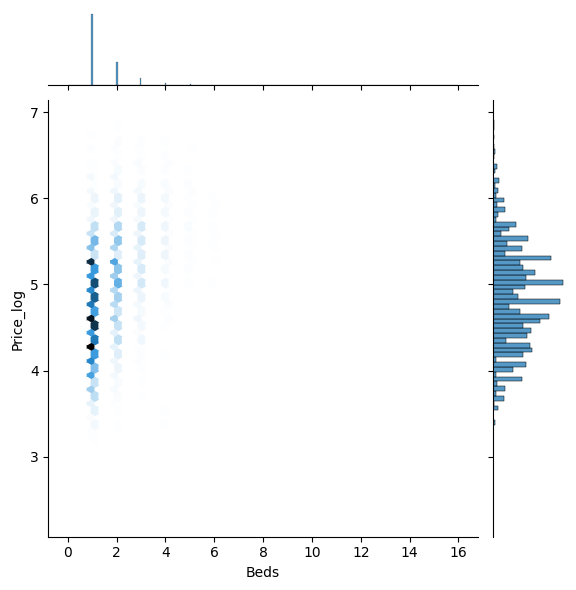

In [92]:
sns.jointplot(x=df['Beds'], y=df['Price_log'], kind='hex')
plt.show()

Price_log is normally distributed with a peak around 5. Most rooms have 0-2 beds. The data is mainly concentrated around 2 beds and price_log between 4-5. The plots in 5 and 6 are misleading because it seems like most rooms have 1-8 beds and the price_log ranges from 3-7 regardless of how many beds there are, which makes it seem like the number of beds doesn't affect the price.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.